In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
sample = 'G6a' # 'G5v', 'G6a', 'Y6v', 'Y6a'
# im = Image.open(sample+'_XZ_128_new.tif')
im = Image.open(sample+'_XZ_256.tif')
# im = Image.open('amga6__rec00001201_yz_select280_erode+dilate.tif')
imarray = np.array(im)

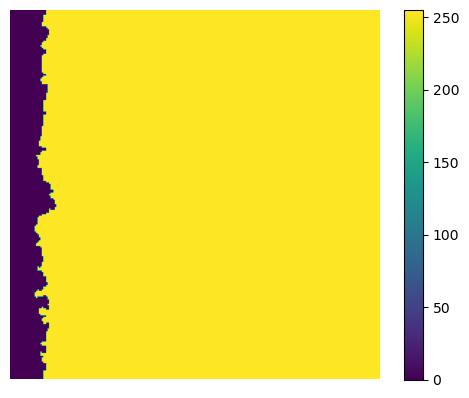

In [3]:
def plot_image(img):
    fig = plt.figure()
    im1 = plt.imshow(img)
    plt.axis('off')
    plt.colorbar(im1)

plot_image(imarray)

In [4]:
def createPlate(img):
    '''The input img should be binary'''
    PIXEL = 0.0061  # mm
    radius = PIXEL/2
    nrows, ncols = img.shape[0], img.shape[1]
    img_size_x = ncols * PIXEL
    img_size_y = nrows * PIXEL
    box = [[0, img_size_x], [0, img_size_y], [0, 1]]
    xyz = []
    for j in range(nrows):
        y = img_size_y - (radius + PIXEL*j)
        for i in range(ncols):
            x = radius + PIXEL*i
            if (img[j][i] == 255):
                xyz.append([x, y, 0])

    return xyz, box


xyz, box = createPlate(imarray)

In [5]:
len(xyz)

59590

In [6]:
def writeDump(dumpFile, xyz, box):
    fpt = open(dumpFile, "w")

    fpt.write("ITEM: TIMESTEP\n")
    fpt.write("0\n")
    fpt.write("ITEM: NUMBER OF ATOMS\n")
    fpt.write("{0}\n".format(len(xyz)))
    fpt.write("ITEM: BOX BOUNDS pp pp pp\n")
    fpt.write("{0:8.8f} {1:8.8f}\n".format(box[0][0], box[0][1]))
    fpt.write("{0:8.8f} {1:8.8f}\n".format(box[1][0], box[1][1]))
    fpt.write("{0:8.8f} {1:8.8f}\n".format(box[2][0], box[2][1]))

    fpt.write("ITEM: ATOMS id type x y z\n")
    for k in range(len(xyz)):
        fpt.write("{0} {1} {2:.4e} {3:.4e} {4:.4e} \n".format(k, 0,
                xyz[k][0], xyz[k][1], xyz[k][2]))


writeDump(sample+'_critical_site.dump', xyz, box)